In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
content = pd.read_csv('Content (1).csv')

In [3]:
reaction = pd.read_csv('Reactions (1).csv')

In [4]:
reactiontypes = pd.read_csv('ReactionTypes (1).csv')

# Dropping Columns

In [5]:
content.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Category', 'URL'], dtype='object')

In [6]:
content = content.drop(['Unnamed: 0','User ID','URL'],axis=1)

In [7]:
reaction.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Datetime'], dtype='object')

In [8]:
reaction = reaction.drop(['Unnamed: 0','User ID'],axis=1)

In [9]:
reactiontypes.columns

Index(['Unnamed: 0', 'Type', 'Sentiment', 'Score'], dtype='object')

In [10]:
reactiontypes = reactiontypes.drop(['Unnamed: 0'],axis=1)

# Null Values

In [11]:
content.isnull().sum()

Content ID    0
Type          0
Category      0
dtype: int64

In [12]:
reaction.isnull().sum()

Content ID      0
Type          980
Datetime        0
dtype: int64

In [13]:
reaction = reaction.dropna(axis=0)

In [14]:
reactiontypes.isnull().sum()

Type         0
Sentiment    0
Score        0
dtype: int64

# Change data types

In [15]:
content.dtypes

Content ID    object
Type          object
Category      object
dtype: object

In [16]:
reaction.dtypes

Content ID    object
Type          object
Datetime      object
dtype: object

In [17]:
reaction.Datetime = pd.to_datetime(reaction.Datetime)

In [18]:
reactiontypes.dtypes

Type         object
Sentiment    object
Score         int64
dtype: object

# Correct spelling or bad characters

In [19]:
content.iloc[:,2].value_counts()

technology           71
travel               67
animals              67
culture              63
science              63
healthy eating       61
fitness              61
food                 61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
public speaking      48
veganism             48
Fitness               5
Science               4
Animals               4
"culture"             3
"soccer"              3
Soccer                3
Travel                2
Food                  2
Studying              2
Education             2
"dogs"                2
"studying"            1
Healthy Eating        1
"technology"          1
Technology            1
"veganism"            1
Culture               1
Public Speaking       1
"science"             1
"cooking"             1
"public speaking"     1
"food"                1
"animals"             1
Veganism              1
"tennis"              1
Name: Category, 

In [20]:
content.iloc[:,2] = content.iloc[:,2].str.replace('"',"")

In [21]:
content.iloc[:,2] = content.iloc[:,2].str.capitalize()

In [22]:
reaction.iloc[:,1].value_counts()

heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: Type, dtype: int64

# Remove duplicates

In [23]:
content[content.duplicated()]

,Content ID,Type,Category


In [24]:
reaction[reaction.duplicated()]

,Content ID,Type,Datetime


In [25]:
reactiontypes[reactiontypes.duplicated()]

,Type,Sentiment,Score


# Change column names

In [26]:
content.columns

Index(['Content ID', 'Type', 'Category'], dtype='object')

In [27]:
content = content.rename(columns={'Type':'Content_type'})

In [28]:
reaction = reaction.rename(columns={'Type':'Reaction_type'})

# Data merging

In [29]:
reaction.head(3)

,Content ID,Reaction_type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58


In [30]:
merge_table = reaction.merge(content,how='inner',on='Content ID')

In [31]:
content.head(3)

,Content ID,Content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,Healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,Healthy eating


In [32]:
merge_table.head()

,Content ID,Reaction_type,Datetime,Content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying


In [33]:
def labels(x):
    if x == 'heart':
        return 60
    elif x == 'want':
        return 70
    elif x == 'disgust':
        return 0
    elif x == 'hate':
        return 5
    elif x == 'interested':
        return 30
    elif x == 'indifferent':
        return 20
    elif x == 'love':
        return 65
    elif x == 'super love':
        return 75
    elif x == 'cherish':
        return 70
    elif x == 'adore':
        return 72
    elif x == 'like':
        return 50
    elif x == 'dislike':
        return 10
    elif x == 'intrigued':
        return 45
    elif x == 'peeking':
        return 35
    elif x == 'scared':
        return 15
    elif x == 'worried':
        return 12
    else:
        return 'N/A'
    

In [34]:
merge_table['Score'] = merge_table['Reaction_type'].apply(labels)

In [35]:
merge_table['Day'] = merge_table.Datetime.dt.day_name()

In [36]:
merge_table['Month'] = merge_table.Datetime.dt.month_name()

In [37]:
merge_table['WeekDay']=merge_table.Datetime.dt.dayofweek

# Analysis

In [38]:
Top5 = merge_table.groupby('Category')['Score'].sum().nlargest(5)

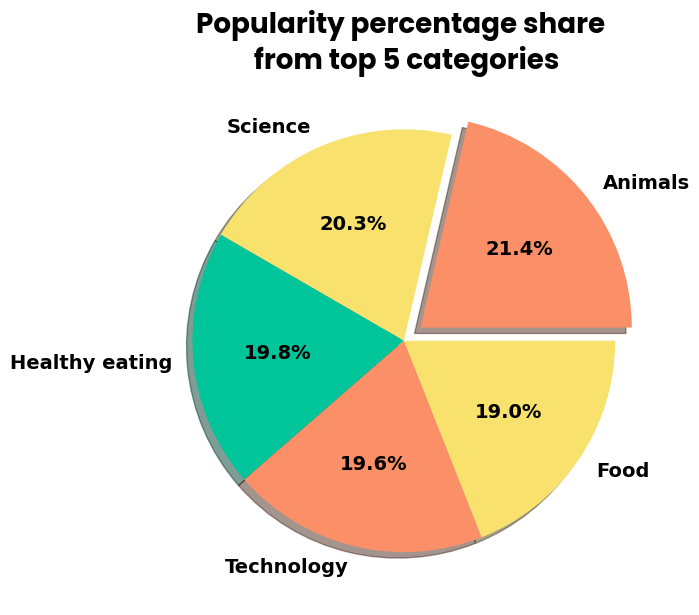

In [39]:
plt.figure(figsize=(7,7),dpi=100)
plt.pie(Top5.values,labels=Top5.index,shadow=True,colors=['#FB8F67','#F8E16C','#00C49A'],autopct='%1.1f%%', \
       textprops = {"color":'black','size':14,"weight":'bold'},explode=(0.1,0,0,0,0))
plt.title('Popularity percentage share \n from top 5 categories',size=20, weight='bold',fontfamily='poppins')
plt.savefig('PieViz.png',transparent=True,dpi=200,pad_inches=0.9,bbox_inches='tight')

In [40]:
Animal_Content = merge_table[merge_table.Category == "Animals"]['Content_type'].value_counts()

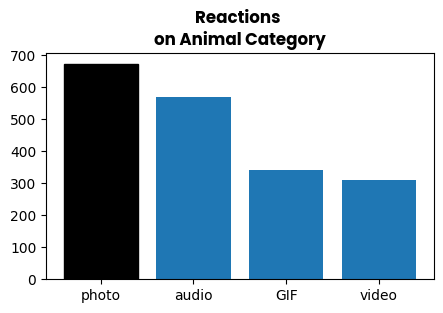

In [79]:
plt.figure(figsize=(5,3),dpi=100)
plt.bar(Animal_Content.index,Animal_Content.values)[0].set_color('black')
plt.title('Reactions \non Animal Category',fontfamily='poppins',size=12,weight='bold')


plt.savefig('barviz.png',transparent=True,dpi=100,pad_inches=0.9,bbox_inches='tight')

In [77]:
merge_table.groupby(['Category','Content_type'])['Reaction_type'].count()

Category         Content_type
Animals          GIF             342
                 audio           570
                 photo           674
                 video           311
Cooking          GIF             512
                 audio           379
                 photo           450
                 video           323
Culture          GIF             490
                 audio           396
                 photo           432
                 video           358
Dogs             GIF             200
                 audio           233
                 photo           330
                 video           575
Education        GIF             192
                 audio           318
                 photo           548
                 video           375
Fitness          GIF             322
                 audio           317
                 photo           328
                 video           428
Food             GIF             444
                 audio           401
        

In [42]:
Catgeory_Reactions = merge_table.groupby('Category')['Reaction_type'].count()

In [43]:
Catgeory_Reactions

Category
Animals            1897
Cooking            1664
Culture            1676
Dogs               1338
Education          1433
Fitness            1395
Food               1699
Healthy eating     1717
Public speaking    1217
Science            1796
Soccer             1457
Studying           1363
Technology         1698
Tennis             1328
Travel             1647
Veganism           1248
Name: Reaction_type, dtype: int64

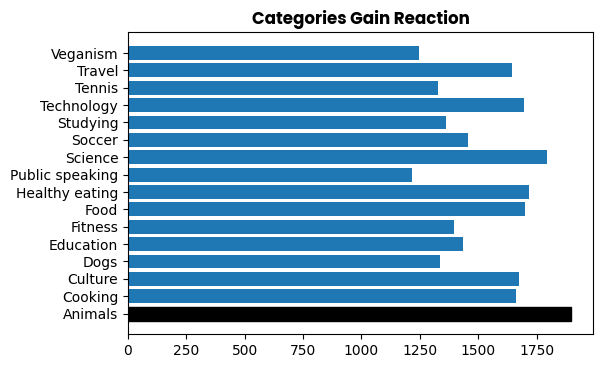

In [44]:
plt.figure(dpi=100)
plt.barh(Catgeory_Reactions.index,Catgeory_Reactions.values)[0].set_color('black')
plt.title('Categories Gain Reaction',size=12,fontfamily='poppins',weight='bold')
plt.show()

In [45]:
month_posts = merge_table.groupby('Month')['Content ID'].count()

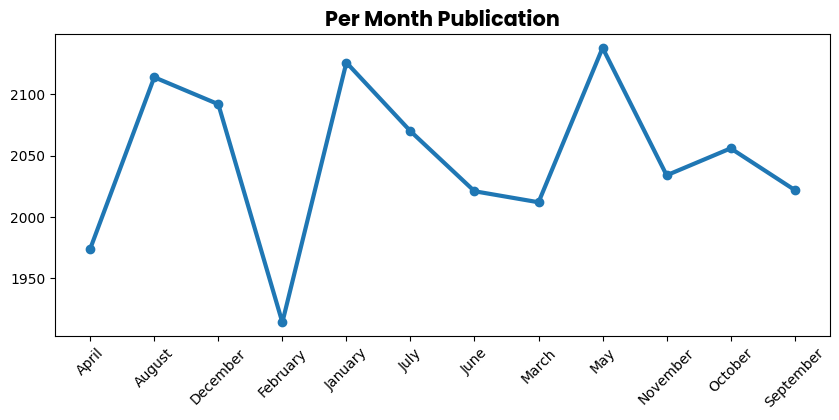

In [46]:
plt.figure(figsize=(10,4),dpi=100)
plt.plot(month_posts.index,month_posts.values,lw=3,marker='o')
plt.title('Per Month Publication', fontfamily='poppins',size=15,weight='bold')
plt.tick_params(axis='x',rotation=45,)

In [47]:
month_posts = pd.DataFrame(month_posts)

In [48]:
month_posts = month_posts.reset_index(drop=False)

In [49]:
month_posts= month_posts.set_index('Month')

In [50]:
month_posts = month_posts.loc[['June','July','August', 'September','October','November','December','January','February','March','April','May']]

In [51]:
month_posts['cumsum'] = month_posts.values.cumsum()

In [52]:
start = 0
end = 4
posts = []
for i in range(3):
    x = sum(month_posts['Content ID'][start:end])
    posts.append(x)
    end += 4
posts

[8227, 16535, 24573]

In [53]:
posts_prop = []
for i in posts:
    i = i/max(posts)
    i = i *  0.3
    i = i + 0.5
    posts_prop.append(i)
posts_prop

[0.6004395067757294, 0.7018679037968502, 0.8]

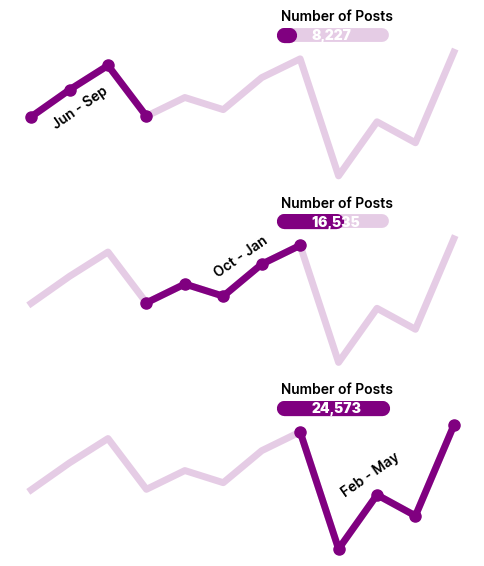

In [67]:
fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(6,7),dpi=100)
axes = [ax1,ax2,ax3]
for ax in axes:
    ax.plot(month_posts.index,month_posts['Content ID'],alpha=0.2,lw=5,color='purple')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(left=0,bottom=0)
    for i in ['left','right','top','bottom']:
        ax.spines[i].set_visible(False)
    ax.axhline(2170,xmin=0.59,xmax=0.8,lw=10,color='purple',alpha=0.2,solid_capstyle='round')
        
ax1.plot(month_posts.index[:4],month_posts['Content ID'][:4],alpha=1,lw=5,color='purple',marker='o',ms=8)
ax2.plot(month_posts.index[3:8],month_posts['Content ID'][3:8],alpha=1,lw=5,color='purple',marker='o',ms=8)
ax3.plot(month_posts.index[7:],month_posts['Content ID'][7:],alpha=1,lw=5,color='purple',marker='o',ms=8)

ax1.text(0.5,1999,'Jun - Sep',size=10,rotation=35,weight ='semibold',fontfamily='Inter')
ax2.text(4.7,2069,'Oct - Jan',size=10,rotation=35,weight ='semibold',fontfamily='Inter')
ax3.text(8,2009,'Feb - May',size=10,rotation=35,weight ='semibold',fontfamily='Inter')

for max_val,ax,post in zip(posts_prop,axes,posts):
    ax.axhline(2170,xmin=0.59,xmax=max_val,lw=11,color='purple',solid_capstyle='round')
    ax.text(7.3,2160,format(post,","),color='white',weight='black',fontfamily='Inter')
    ax.text(6.5,2195,'Number of Posts',fontfamily='Inter',weight='semibold')

# ax1.text(2.3,2300,'Social Buzz Content Publication',fontfamily='Inter',weight='bold',size=17,color='purple')
plt.savefig('storytelling.png',transparent=True,dpi=100,pad_inches=0.9,bbox_inches='tight')